In [1]:
import astropy.stats as apy

In [2]:
import bk.load
import bk.compute
import bk.plot
import bk.signal

In [3]:
import pandas as pd
import numpy as np
import scipy as sp

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy.signal
import scipy.stats

In [6]:
import os

In [7]:
os.getcwd()

'/home/billel/pCloudDrive/IFM/work/Code/Python/Billel'

In [8]:
bk.load.current_session_linux()
states = bk.load.states()
# lfp = bk.load.lfp_in_intervals(166,23,states['Rem'])
lfp = bk.load.lfp(23,0,5000)
lfp = lfp.restrict(states['Rem'])
lfp_filt = bk.signal.passband(lfp,4,12)
power,phase = bk.signal.hilbert(lfp_filt)

neurons,metadata = bk.load.loadSpikeData(bk.load.path)

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


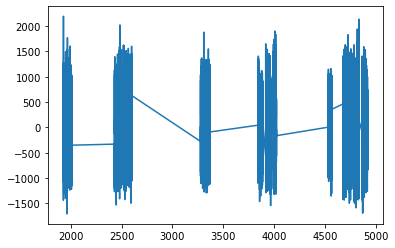

In [9]:
plt.plot(lfp.as_units('s'))

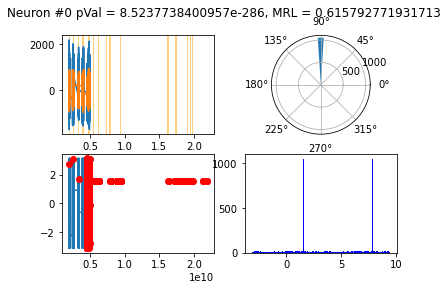

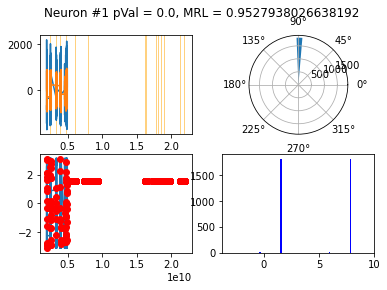

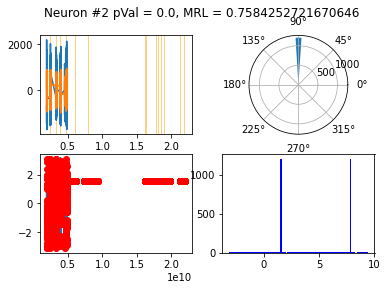

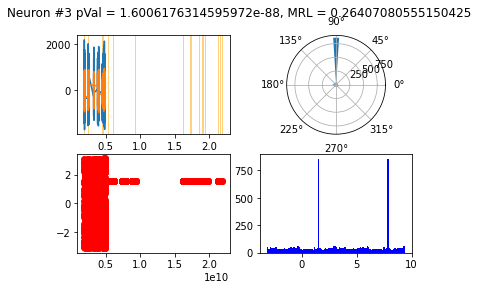

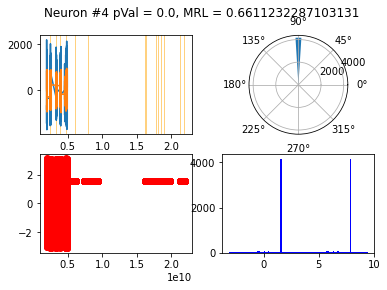

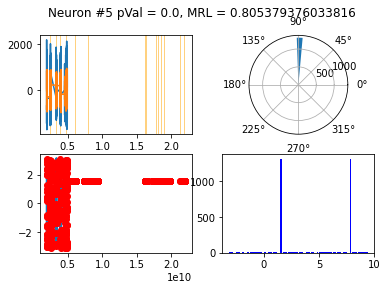

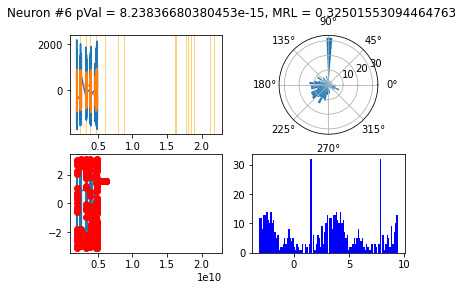

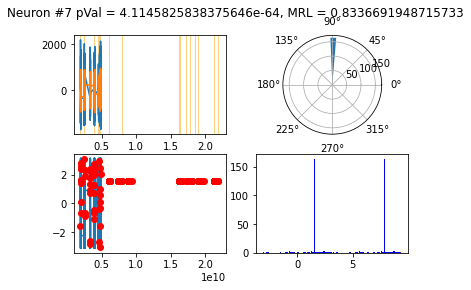

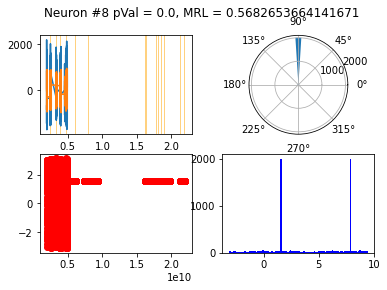

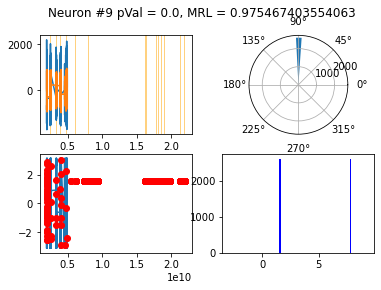

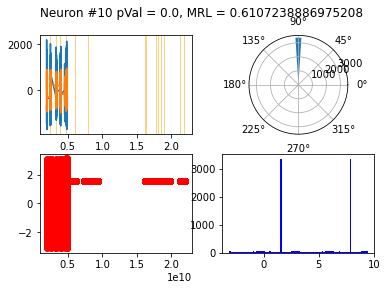

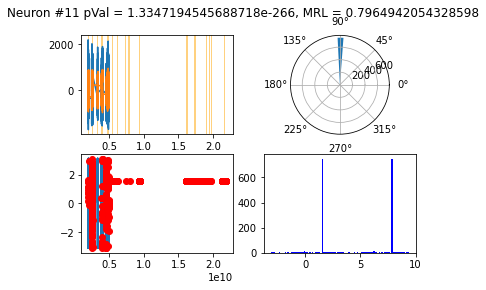

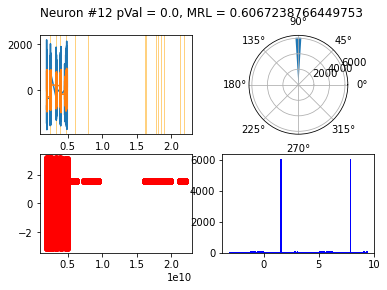

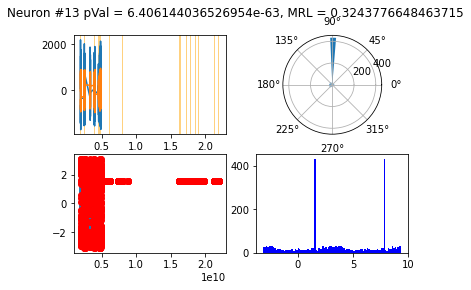

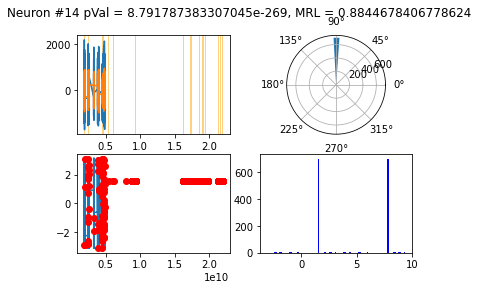

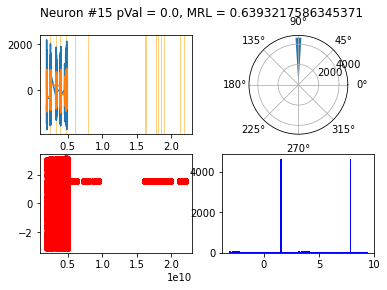

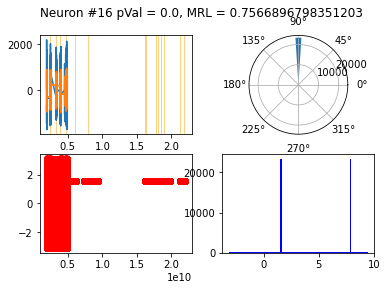

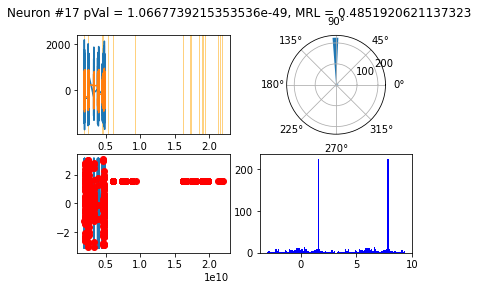

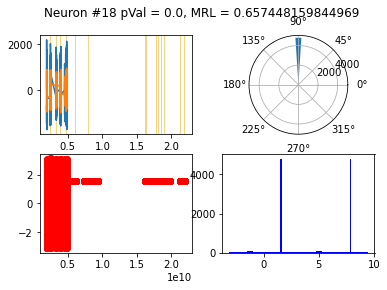

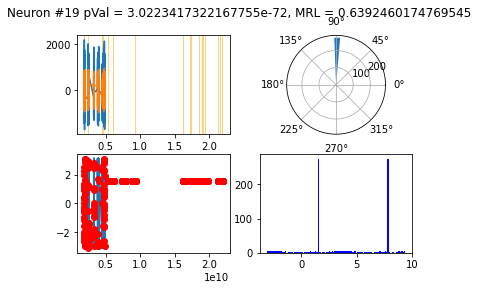

In [10]:
neurons_phase = []
for i,n in enumerate(neurons):
    neurons_phase.append(phase.realign(n.restrict(states['Rem'])))

a = []
pvalue = []
for i,p in enumerate(neurons_phase):
#     print(p.values)
    im = np.exp(1j* p.values)
#     print(im)
    pvalue.append(apy.rayleightest(p.values))
    a.append(np.abs((np.nanmean(im))))
#     print(np.abs(np.nanmean(p)))
#     if pvalue < 0.001 and rvalue > 0.04: print(1)
count = 0
for i in range(20):
    fig,ax = plt.subplot_mosaic('''
                                A.
                                BC
                                ''')
    polar_ax = fig.add_subplot(2,2,2,polar=True)                                       
    ax['A'].plot(lfp)
    ax['A'].plot(lfp_filt)
    plt.sca(ax['A'])
    bk.plot.intervals(states['Rem'],time_units='us')
    ax['B'].plot(phase)
    ax['B'].plot(neurons_phase[i],'ro')

    h,a_bin = np.histogram(neurons_phase[i].values,50)
    a_bin = np.convolve(a_bin,[.5,.5],'same')[1::]
#     a = a*(360/np.pi)
    polar_ax.bar(a_bin,h,a_bin[1]-a_bin[0])
    ax['C'].bar(a_bin,h,a_bin[1]-a_bin[0],color ='blue')
    ax['C'].bar(a_bin+2*np.pi,h,a_bin[1]-a_bin[0],color ='blue')
#     ax['C'].set_xlim([])

    ax['A'].get_shared_x_axes().join(ax['A'], ax['B']) 
    plt.suptitle(f'Neuron #{i} pVal = {pvalue[i]}, MRL = {a[i]}')
    
    if (pvalue[i] <0.001) and (a[i] > 0.04): count += 1

In [ ]:
count

In [ ]:
apy.rayleightest()

In [ ]:
p.as_units('s')

In [ ]:
h.shape

In [ ]:
t